In [118]:
#reference: https://www.ics.uci.edu/~mohamadt/keras_mnist.html
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Input
from keras.utils import np_utils

from keras.regularizers import l2

In [119]:
from keras.utils import np_utils
from tensorflow import keras
import keras
from keras.datasets import mnist

#x==data
#y==labels

#creating tuples
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print("Original X shape", X_train.shape)
print("Original Y shape", Y_train.shape)

# Reshape data. 
X_train = X_train.reshape(60000, 784)
X_test  = X_test.reshape(10000, 784)

# cast data to float type. Then we normalize it to give it a common scale
X_train = X_train.astype('float32') 
X_test  = X_test.astype('float32')
X_train /= 255 # Original data is uint8 (0-255). Scale it to range [0,1].
X_test  /= 255

print("Training X matrix shape", X_train.shape)
print("Testing X matrix shape", X_test.shape)
print (Y_train[0])

# Represent the targets as one-hot vectors: e.g. 2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0].
nb_classes = 10
Y_train = np_utils.to_categorical(Y_train, nb_classes)
Y_test  = np_utils.to_categorical(Y_test, nb_classes)
print("Training Y matrix shape", Y_train.shape)
print("Testing Y matrix shape", Y_test.shape)

Original X shape (60000, 28, 28)
Original Y shape (60000,)
Training X matrix shape (60000, 784)
Testing X matrix shape (10000, 784)
5
Training Y matrix shape (60000, 10)
Testing Y matrix shape (10000, 10)


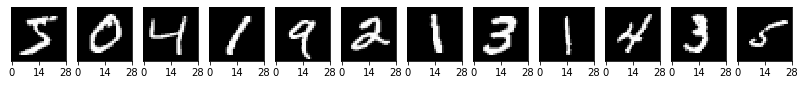

In [146]:
# Plot examples of the data.
plt.figure(1, figsize=(14,14))
for i in range(12):
    plt.subplot(1,12,i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap='gray')
    plt.xticks([0,14,28])
    plt.yticks([])
    

In [121]:
# Simple fully-connected neural network with 2 hidden layers.
# initialising a linear stack of layers
model = Sequential()
#input shape is a tuple with 1 entry
model.add(Dense(256, activation='relu', input_shape=(784,), W_regularizer=l2(0.001))) # Use input_shape=(28,28) for unflattened data.
model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.2)) # Including dropout layer helps avoid overfitting.
model.add(Dense(10, activation='softmax')) # Use softmax layer for multi-class problems.

/home/markg/PycharmProjects/EmergingTechnologiesProject/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, activation="relu", input_shape=(784,), kernel_regularizer=<keras.reg...)`
  after removing the cwd from sys.path.


In [122]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_29 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_30 (Dense)             (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [123]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [124]:
#model.fit trains the data 10 times
#verbose means returning the full or complete response. No verbose means trimming the unnecessary details 
history = model.fit(X_train, Y_train, batch_size=128, nb_epoch=10, verbose=1, 
                    validation_data=(X_test, Y_test))

/home/markg/PycharmProjects/EmergingTechnologiesProject/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 78us/step - loss: 0.4295 - accuracy: 0.9232 - val_loss: 0.2380 - val_accuracy: 0.9579
Epoch 2/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.2027 - accuracy: 0.9658 - val_loss: 0.1822 - val_accuracy: 0.9668
Epoch 3/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.1570 - accuracy: 0.9736 - val_loss: 0.1530 - val_accuracy: 0.9718
Epoch 4/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.1366 - accuracy: 0.9772 - val_loss: 0.1307 - val_accuracy: 0.9782
Epoch 5/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.1258 - accuracy: 0.9790 - val_loss: 0.1308 - val_accuracy: 0.9769
Epoch 6/10
60000/60000 [==============================] - 5s 76us/step - loss: 0.1168 - accuracy: 0.9808 - val_loss: 0.1357 - val_accuracy: 0.9761
Epoch 7/10
60000/60000 [==============================] - 4s 75us/st

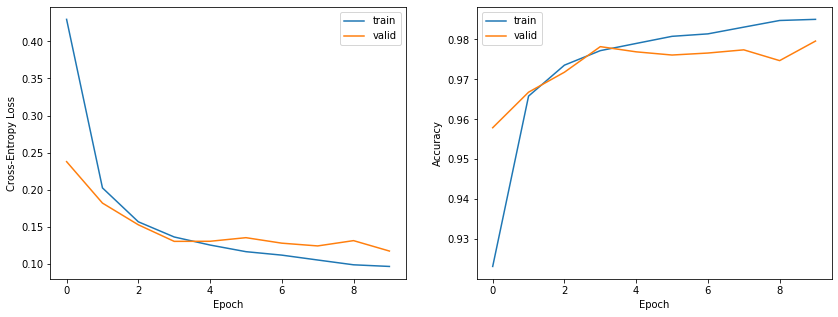

In [125]:
#Plot loss trajectory throughout training.
plt.figure(1, figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.legend()
 
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='valid')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [126]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test cross-entropy loss: %0.5f' % score[0])
print('Test accuracy: %0.2f' % score[1])

Test cross-entropy loss: 0.11766
Test accuracy: 0.98


In [127]:
print (score)

[0.11766120549440384, 0.9796000123023987]


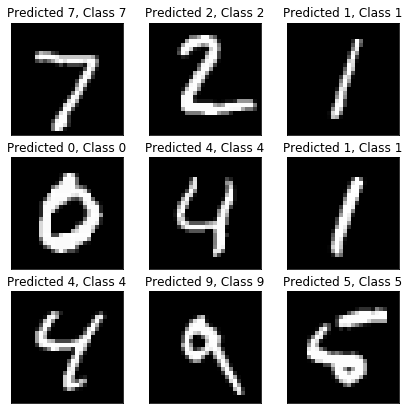

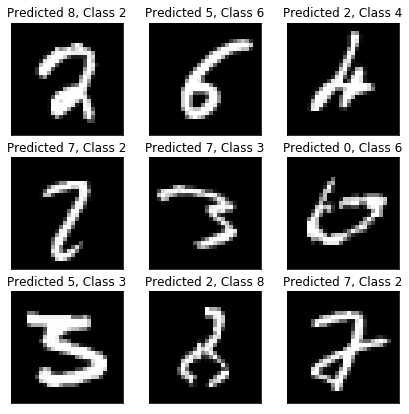

In [148]:
predicted_classes = model.predict_classes(X_test)
correct_indices   = np.nonzero(predicted_classes == Y_test.argmax(axis=-1))[0]
incorrect_indices = np.nonzero(predicted_classes != Y_test.argmax(axis=-1))[0]

plt.figure(1, figsize=(7,7))
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], Y_test[correct].argmax(axis=-1)))
    plt.xticks([])
    plt.yticks([])
    
plt.figure(2, figsize=(7,7))
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], Y_test[incorrect].argmax(axis=-1)))
    plt.xticks([])
    plt.yticks([])

(256,)


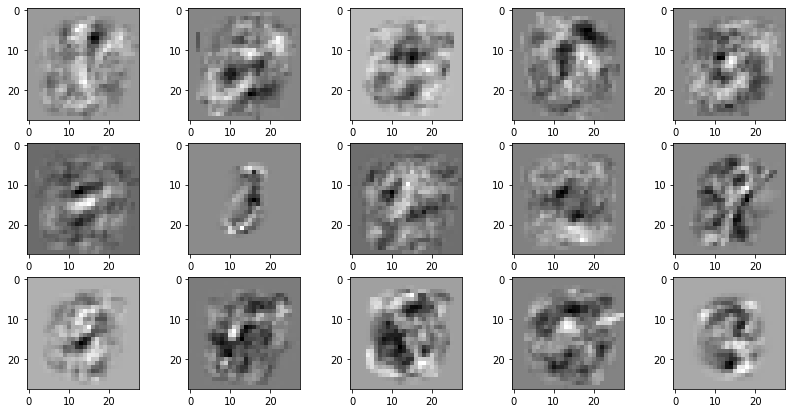

In [150]:
# We can get an 
#W = model.layers[0].W.get_value() # Weight matrix W is a shared variable object, not a numpy array.
W = model.layers[0].get_weights()[0]
print (W[0].shape)
plt.figure(1, figsize=(14,7))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(W[:,i].reshape(28,28), cmap='gray', interpolation='none')